<a href="https://colab.research.google.com/github/Webiwo/publications/blob/main/experiments/Convolutional_Neural_Networks_and_Computer_Vision_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://poloclub.github.io/cnn-explainer/

## Get the data

* https://www.kaggle.com/datasets/dansbecker/food-101
* https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

In [ ]:
# We'll download the pizza_steak subset .zip file and unzip it.

import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-05-26 10:33:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.207, 142.250.107.207, 192.178.163.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   139MB/s    in 0.8s    

2025-05-26 10:33:21 (139 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

In [ ]:
import os

for root, dirs, files in os.walk("pizza_steak"):
  print(f"There are {len(dirs)} directories and {len(files)} images in '{root}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
# Get the class names

import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [ ]:
# View an image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class + ": " + random_image[0])
  plt.axis("off")

  print(f"Image shape: {img.shape}")  # width, height, colour channels
  return img

Image shape: (512, 512, 3)


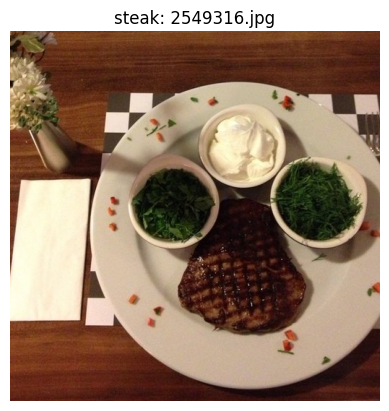

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

Image shape: (512, 384, 3)


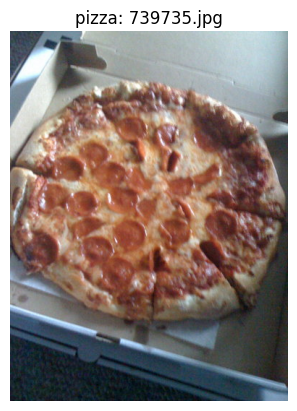

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[ 61,  68,  74],
        [ 62,  66,  75],
        [ 64,  68,  77],
        ...,
        [142, 174, 173],
        [138, 170, 169],
        [138, 170, 169]],

       [[ 56,  71,  78],
        [ 55,  68,  76],
        [ 57,  67,  77],
        ...,
        [142, 172, 172],
        [139, 169, 169],
        [139, 169, 169]],

       [[ 52,  74,  85],
        [ 51,  71,  82],
        [ 51,  68,  78],
        ...,
        [143, 171, 172],
        [140, 168, 169],
        [139, 167, 168]],

       ...,

       [[ 19,  29,  38],
        [ 16,  26,  35],
        [ 16,  26,  35],
        ...,
        [121, 147, 170],
        [120, 145, 167],
        [117, 142, 164]],

       [[ 28,  27,  43],
        [ 24,  23,  39],
        [ 18,  22,  34],
        ...,
        [119, 145, 168],
        [118, 145, 166],
        [117, 144, 165]],

       [[ 38,  26,  48],
        [ 31,  22,  43],
        [ 23,  19,  36],
        ...,
        [114, 142, 16

## An end-to-end example

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

tf.random.set_seed(42)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode='binary',  # steak or pizza
    seed=42
)

valid_data = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode='binary',  # or 'int', 'categorical'
    seed=42
)

normalization_layer = tf.keras.layers.Rescaling(1./255)
train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
valid_data = valid_data.map(lambda x, y: (normalization_layer(x), y))


# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.Input(shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # filters, kernel_size, activation
  tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),

  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_1 = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
    )

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - accuracy: 0.6561 - loss: 0.6432 - val_accuracy: 0.8220 - val_loss: 0.4365
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8107 - loss: 0.4380 - val_accuracy: 0.8000 - val_loss: 0.4155
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.8309 - loss: 0.3895 - val_accuracy: 0.7560 - val_loss: 0.4966
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.8553 - loss: 0.3678 - val_accuracy: 0.8580 - val_loss: 0.3326
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.8842 - loss: 0.3053 - val_accuracy: 0.8160 - val_loss: 0.3785


In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 107, 107, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,575 (353.81 KB)

 Trainable params: 30,191 (117.93 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 60,384 (235.88 KB)

<Axes: >

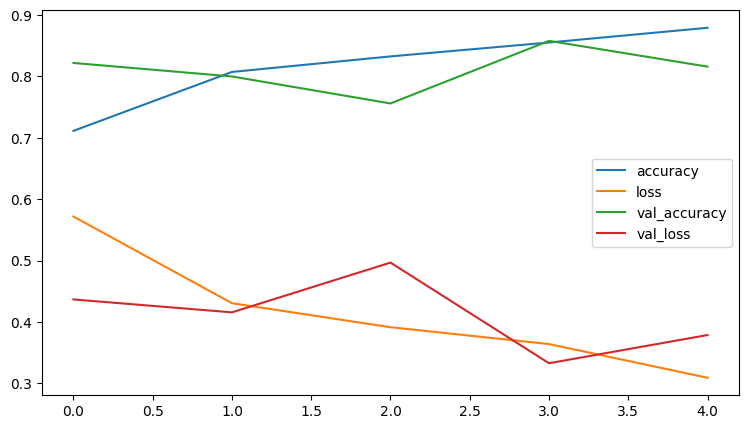

In [ ]:
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(9, 5))

In [ ]:
model_1.evaluate(valid_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8185 - loss: 0.3609


[0.3785363733768463, 0.8159999847412109]

## MIT example

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

tf.random.set_seed(42)

# Create a model
model_mit = tf.keras.models.Sequential([
  tf.keras.Input(shape=(224, 224, 3)),

  # first convolutional layer
  tf.keras.layers.Conv2D(32, 3, activation="relu"), # filters, kernel_size, activation
  tf.keras.layers.MaxPool2D(pool_size=2, strides=2),

  # second convolutional layer
  tf.keras.layers.Conv2D(64, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),

  # fully connected classifier
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")  # Dense(10, activation="softmax")
])

model_mit.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_mit = model_mit.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
    )

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 261ms/step - accuracy: 0.5247 - loss: 4.7278 - val_accuracy: 0.7020 - val_loss: 0.5498
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - accuracy: 0.7609 - loss: 0.5095 - val_accuracy: 0.7700 - val_loss: 0.4750
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.8833 - loss: 0.2994 - val_accuracy: 0.7640 - val_loss: 0.4826
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.9009 - loss: 0.2617 - val_accuracy: 0.7940 - val_loss: 0.4621
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9749 - loss: 0.0889 - val_accuracy: 0.8060 - val_loss: 0.6003


In [ ]:
model_mit.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │   191,104,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 573,373,253 (2.14 GB)

 Trainable params: 191,124,417 (729.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 382,248,836 (1.42 GB)

<Axes: >

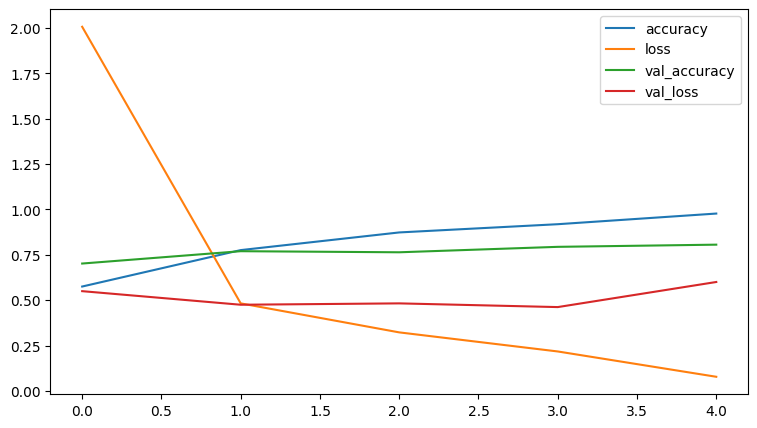

In [ ]:
pd.DataFrame(history_mit.history).plot(figsize=(9, 5))

In [ ]:
model_mit.evaluate(valid_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7982 - loss: 0.5771


[0.6003474593162537, 0.8059999942779541]

### Let's create another model

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.models.Sequential([
  tf.keras.Input(shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_2 = model_2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
    )

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - accuracy: 0.6313 - loss: 1.7042 - val_accuracy: 0.8020 - val_loss: 0.4321
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.8620 - loss: 0.3782 - val_accuracy: 0.8340 - val_loss: 0.3786
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.9478 - loss: 0.1908 - val_accuracy: 0.8400 - val_loss: 0.3734
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.9827 - loss: 0.0835 - val_accuracy: 0.8360 - val_loss: 0.4124
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.9959 - loss: 0.0303 - val_accuracy: 0.8420 - val_loss: 0.4431


<Axes: >

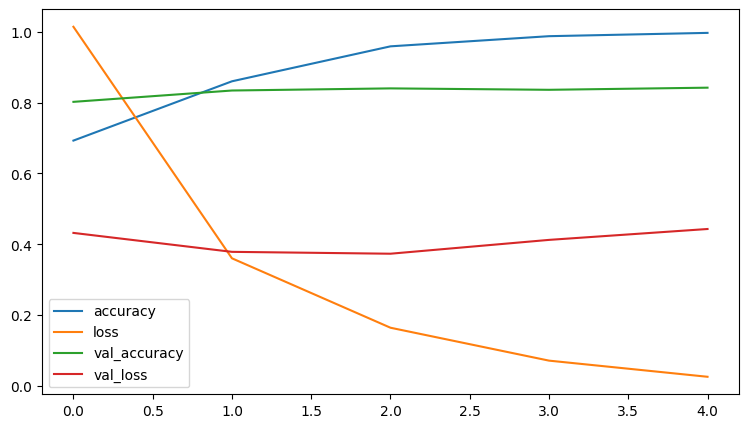

In [ ]:
pd.DataFrame(history_2.history).plot(figsize=(9, 5))

In [ ]:
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 484000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │       484,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,455,575 (5.55 MB)

 Trainable params: 485,191 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 970,384 (3.70 MB)

## 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a basline.
1. Beat the baseline by overfitting a larger model.
2. Reduce overfitting.
So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:

* Increase the number of convolutional layers.
* Increase the number of convolutional filters.
* Add another dense layer to the output of our flattened layer.

In [ ]:

model_3 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_3 = model_3.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
    )

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.5813 - loss: 0.6646 - val_accuracy: 0.7380 - val_loss: 0.5176
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.7250 - loss: 0.5236 - val_accuracy: 0.8400 - val_loss: 0.4043
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.8049 - loss: 0.4220 - val_accuracy: 0.8380 - val_loss: 0.3836
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.8239 - loss: 0.4131 - val_accuracy: 0.8700 - val_loss: 0.3423
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.8495 - loss: 0.3817 - val_accuracy: 0.8420 - val_loss: 0.3565


In [ ]:
model_3.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

<Axes: >

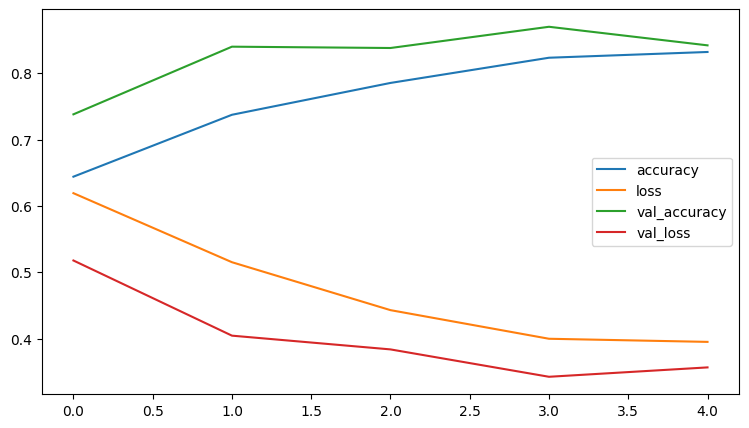

In [ ]:
pd.DataFrame(history_3.history).plot(figsize=(9, 5))

## Data augmentation

Time to dig into our bag of tricks and try another method of overfitting prevention, data augmentation.

**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

tf.random.set_seed(42)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode='binary',  # steak or pizza
    seed=42
)

valid_data = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode='binary',  # or 'int', 'categorical'
    seed=42
)


normalization_layer = tf.keras.layers.Rescaling(1./255)
train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
valid_data = valid_data.map(lambda x, y: (normalization_layer(x), y))

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    #tf.keras.layers.RandomHeight(0.1),
    #tf.keras.layers.RandomWidth(0.1),
], name="data_augmentation")


model_4 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),

    # Data augmentation
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),

    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    #tf.keras.layers.GlobalAveragePooling2D(),  # instead of Flatten()
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_4.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_4 = model_4.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
    )

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.4808 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.5405 - loss: 0.6930 - val_accuracy: 0.6000 - val_loss: 0.6926
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.6682 - loss: 0.6785 - val_accuracy: 0.6560 - val_loss: 0.5807
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.7139 - loss: 0.5504 - val_accuracy: 0.8020 - val_loss: 0.4703
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7680 - loss: 0.4963 - val_accuracy: 0.8120 - val_loss: 0.4399


In [ ]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

<Axes: >

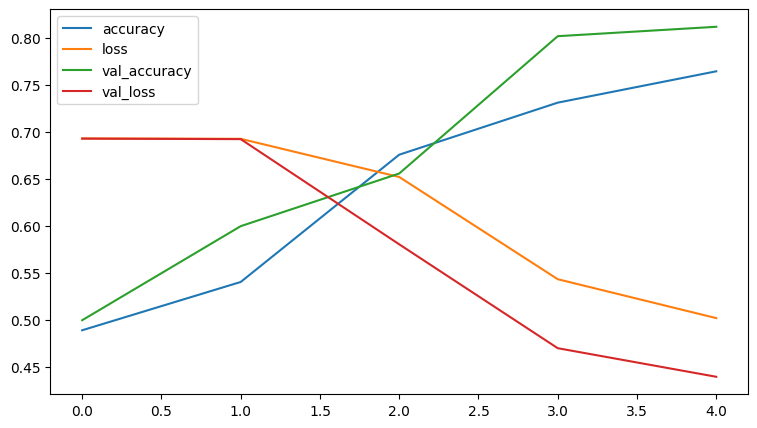

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(9, 5))

### Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Use transfer learning to leverage what another image model has learned and adjust it for our own use case.

--2025-05-26 10:58:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2025-05-26 10:58:52 (44.2 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



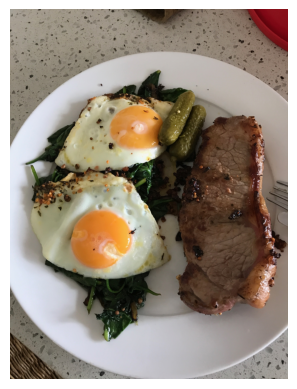

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
# our model was trained on data in the shape of (batch_size, 224, 224, 3) but we can fix this by adding an extra to our custom image tensor using tf.expand_dims.

print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [ ]:
pred = model_3.predict(steak)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


array([[0.8200306]], dtype=float32)

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


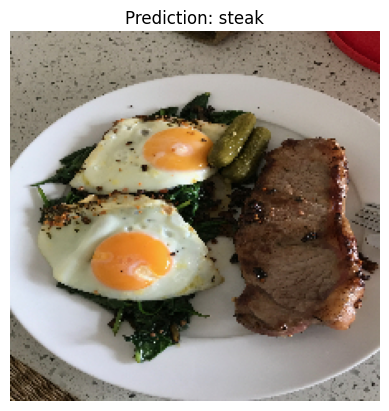

In [ ]:
pred_and_plot(model_3, "03-steak.jpeg", class_names)

--2025-05-26 11:04:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2025-05-26 11:04:54 (42.6 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


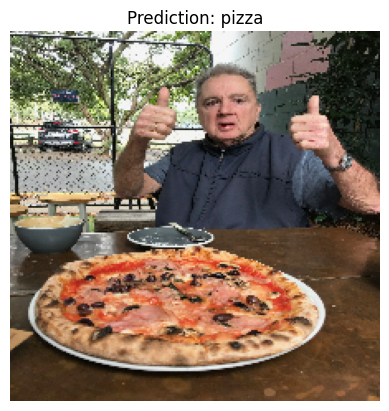

In [ ]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_3, "03-pizza-dad.jpeg", class_names)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0
